## Contents
*regions*
1. 1D Histogram of polarization fraction, col density and gamma

In [5]:
import matplotlib
import aplpy
from astropy.visualization import astropy_mpl_style
import math as m
import scipy.optimize as opt
import statistics as st

from regions import Regions
from regions.core import PixCoord
from regions.shapes import RectangleSkyRegion, RectanglePixelRegion

import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import Angle, SkyCoord
from astropy.utils.data import get_pkg_data_filename
from astropy import units as u
import numpy as np

matplotlib.rcParams.update({'font.size': 11})


In [6]:
regions_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/regions.reg'
orion_A_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/Planck_353GHz_2048_l212.0_b-19.0_w8_fwhm10.fits'
orion_A_cov_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/Planck_353GHz_2048_l212.0_b-19.0_w8_fwhm10_cov.fits'
orion_A_data = get_pkg_data_filename(orion_A_file)
orion_A = fits.open(orion_A_file)
orion_A_cov = fits.open(orion_A_cov_file)
orion_A_cov_data = orion_A_cov[0].data
orion_A.info()
orion_A_cov.info()

Filename: /Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/Planck_353GHz_2048_l212.0_b-19.0_w8_fwhm10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  I_STOKES      1 PrimaryHDU      27   (281, 281)   float64   
  1  Q_STOKES      1 ImageHDU        25   (281, 281)   float64   
  2  U_STOKES      1 ImageHDU        25   (281, 281)   float64   
  3  POLINT        1 ImageHDU        25   (281, 281)   float64   
  4  POL_FRAC      1 ImageHDU        25   (281, 281)   float64   
  5  BPOS_ANG      1 ImageHDU        25   (281, 281)   float64   
  6  POL_DISP      1 ImageHDU        25   (281, 281)   float64   
Filename: /Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/Planck_353GHz_2048_l212.0_b-19.0_w8_fwhm10_cov.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  II_COV        1 PrimaryHDU      27   (281, 281)   float64   
  1  IQ_COV        1 ImageHDU        25   (281, 281)   float64   
  2  IU_COV        1 ImageHD

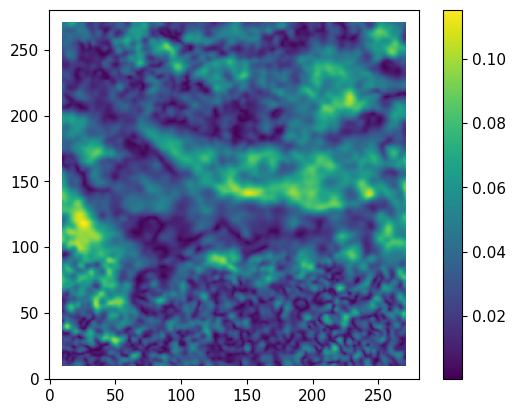

In [16]:
with fits.open(orion_A_file) as orion_A:
    i_stokes = orion_A[0].data
    q_stokes = orion_A[1].data
    u_stokes = orion_A[2].data
    polint = orion_A[3].data
    pol_frac = orion_A[4].data
    bpos_ang = orion_A[5].data
    pol_disp = orion_A[6].data
    
with fits.open(orion_A_cov_file) as orion_A_cov:
    ii_stokes_cov = orion_A_cov[0].data
    iq_stokes_cov = orion_A_cov[1].data
    iu_stokes_cov = orion_A_cov[2].data
    qq_stokes_cov = orion_A_cov[3].data
    qu_stokes_cov = orion_A_cov[4].data
    uu_stokes_cov = orion_A_cov[5].data
    pi_var_cov = orion_A_cov[6].data
    pf_var_cov = orion_A_cov[7].data  ##<--- pol frac??
    bang_var_cov = orion_A_cov[8].data
    s_var_cov = orion_A_cov[9].data

#with fits.open(orionB_file) as orion_B:
#    i_stokes_b = orion_B[0].data
#    q_stokes_b = orion_B[1].data
#    u_stokes_b = orion_B[2].data
#    polint_b = orion_B[3].data
#    pol_frac_b = orion_B[4].data
#    bpos_ang_b = orion_B[5].data
#    pol_disp_b = orion_B[6].data
    
regions = Regions.read(regions_file, format = 'ds9') ##same as parsing?

mask_cov = np.logical_and(pol_frac, polint>3*np.sqrt(pi_var_cov))

wcs = WCS(orion_A[4].header)
plt.imshow(pol_frac)
cbar = plt.colorbar()
plt.gca().invert_yaxis()

#plt.imshow(mask_cov)

In [17]:
mask_cov = np.logical_and(pol_frac, polint>3*np.sqrt(pi_var_cov))
i_good = mask_cov.nonzero()
p_good = pol_frac[i_good]

ti_good = np.transpose(i_good).tolist()

pol_frac[ti_good[2][0], ti_good[2][1]] = p_good[2]

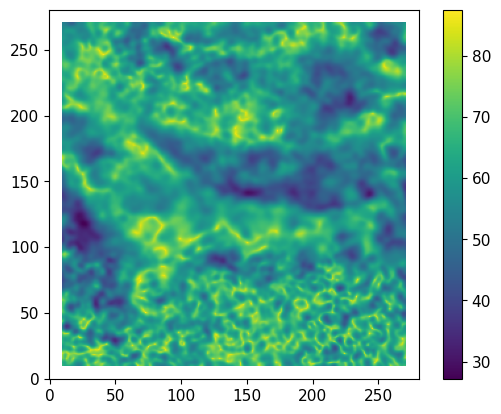

In [20]:
p_0 = 0.15

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)

gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in pol_frac]
plt.imshow(gamma)
cbar = plt.colorbar()
plt.gca().invert_yaxis()

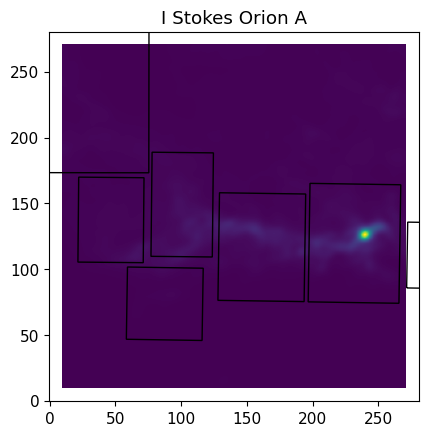

In [21]:
#plt.figure(figsize = (8, 10))

orion_A = fits.open(orion_A_file)

plt.imshow(orion_A[0].data)
plt.title('I Stokes Orion A')

regions_pix = []
for x in range(len(regions)):
    region0 = (RectangleSkyRegion(regions[x].center, regions[x].width, regions[x].height, regions[x].angle))
    regions_pix.append(region0.to_pixel(wcs))
    regions_pix[x].plot()
    
#plt.savefig('Orion A regions')
plt.gca().invert_yaxis()

(281, 281)
(281, 281)


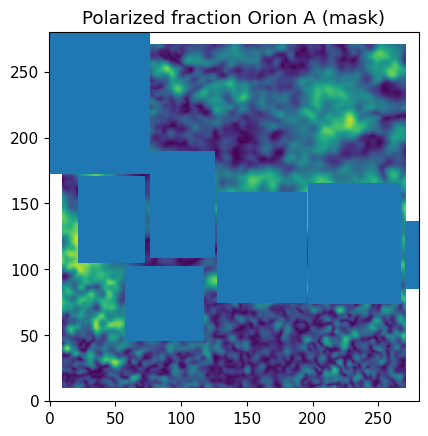

In [24]:
fwhm_10 = fits.getdata(orion_A_file) ##??
plt.imshow(pol_frac)
plt.title('Polarized fraction Orion A (mask)')

ax = plt.subplot(1, 1, 1)
mask_list = []

for x in range(len(regions_pix)):
    mask = regions_pix[x].to_mask()
    mask_list.append(mask)
    ax.add_artist(mask.bbox.as_artist())

print(np.shape(pol_frac))
print(np.shape(polint))
plt.gca().invert_yaxis()

In [29]:
#ax = plt.subplot(1, 1, 1)
mask0 = mask_list[0].to_image(pol_frac.shape)  

mask = np.logical_and(pol_frac[0], mask0 == 1)
mask_coord = mask.nonzero()                     #loc in list where value of mask is True

pol_frac[mask_coord]

pol_frac_list = []

for x in range(len(mask_list)):
    mask0 = mask_list[x].to_image(pol_frac.shape)
    
    mask_t1 = np.logical_and(mask_cov, mask0 == 1)
    mask_coord = mask_t1.nonzero() 
    pol_frac_list.append(pol_frac[mask_coord])
    pol_frac_list[x] = pol_frac_list[x][~np.isnan(pol_frac_list[x])] ##removing all nan values (i.e. from list [3])

    #plt.imshow(mask_t1)
    #plt.title('mask #' + str(x))
    #plt.show()

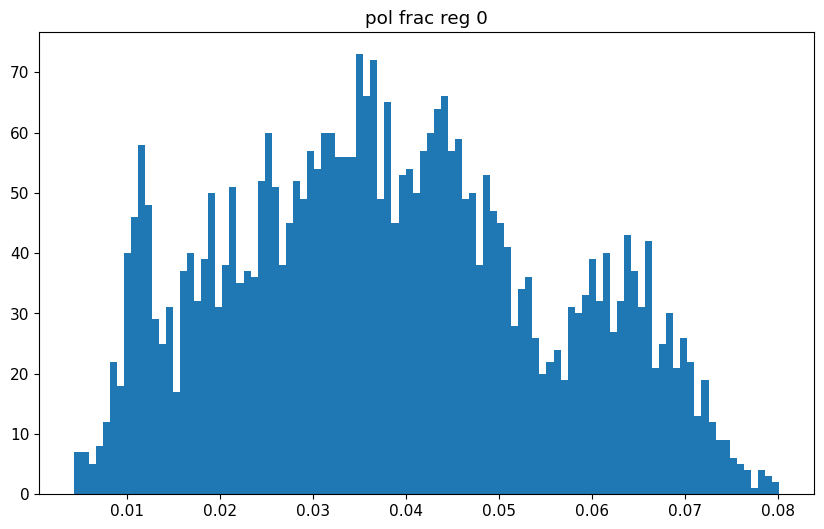

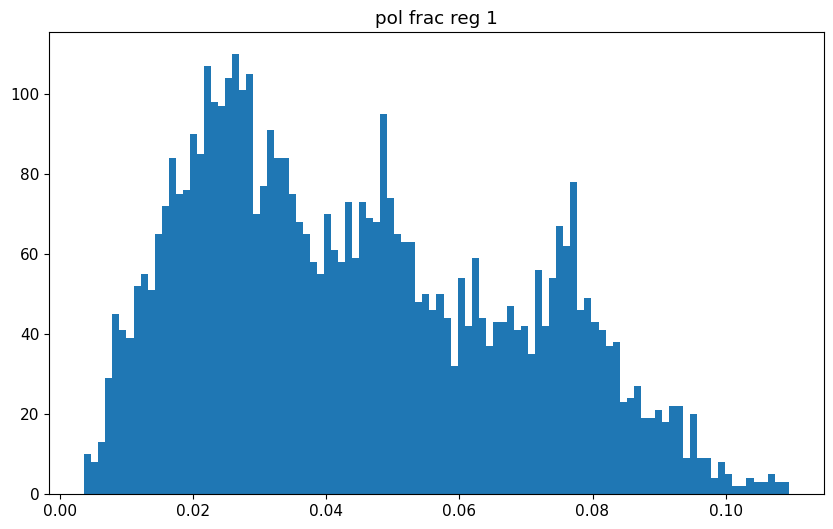

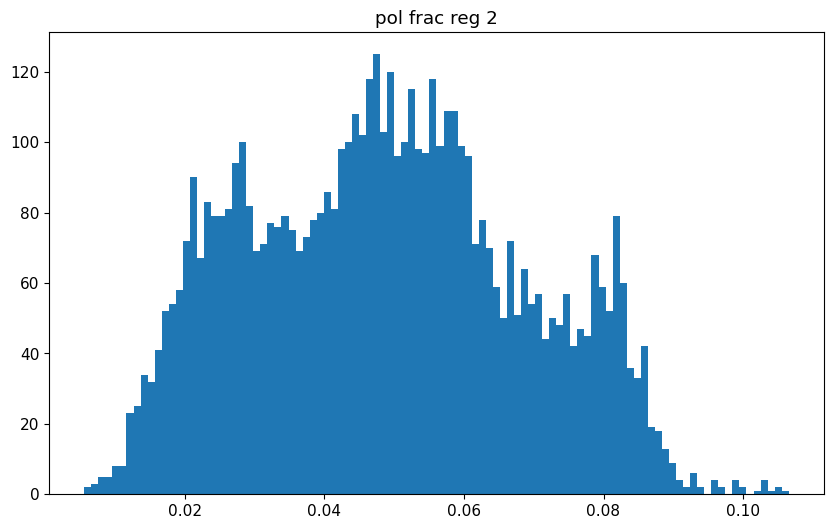

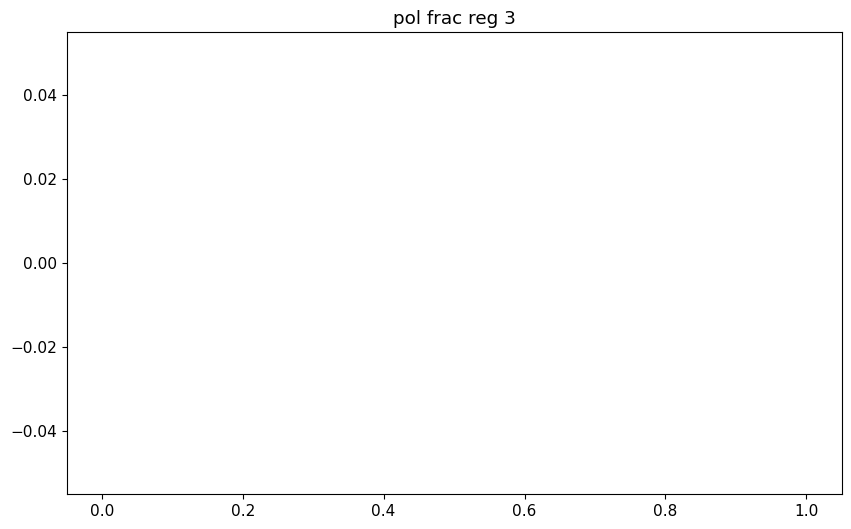

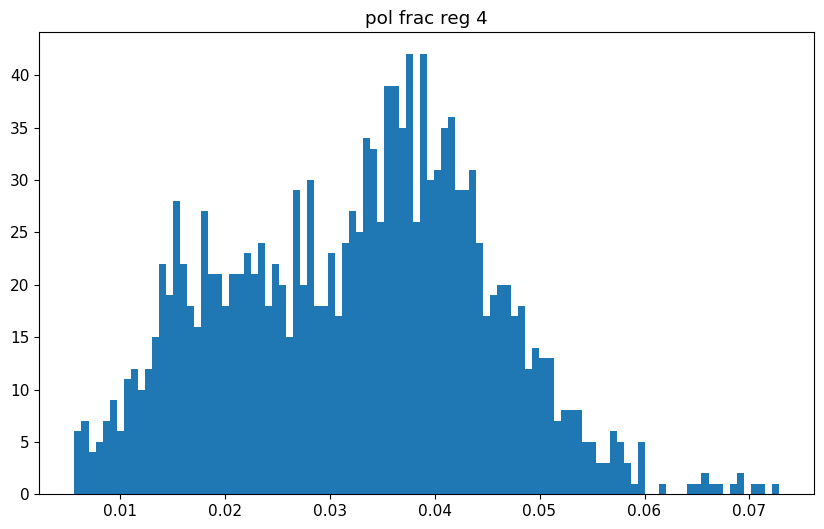

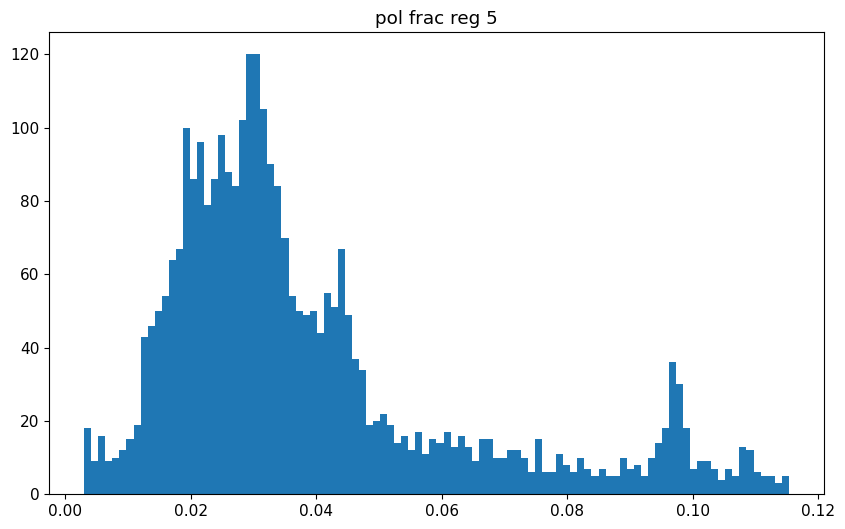

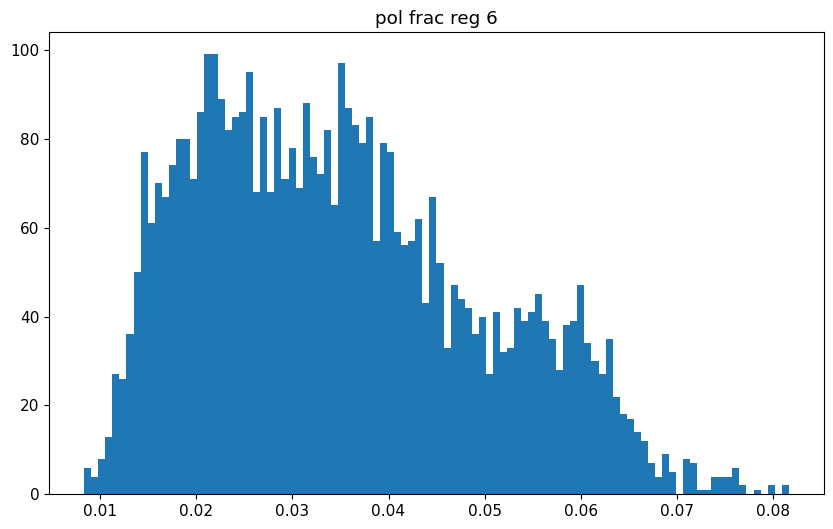

In [26]:
for x in range(len(pol_frac_list)):
    plt.figure(figsize = (10, 6))
    hist, bins, patches = plt.hist(pol_frac_list[x], 100)
    plt.title('pol frac reg '+ str(x))
    plt.savefig('pol_frac_'+str(x)+'orion')
    plt.show()
    

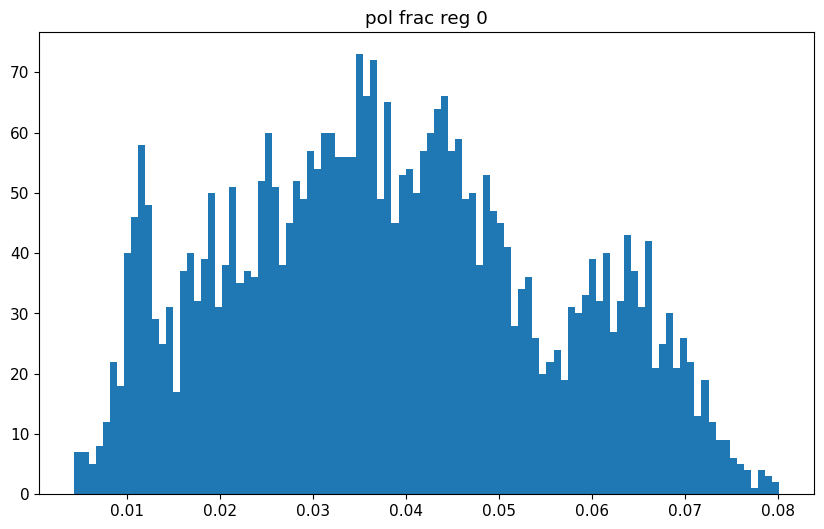

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize = (10, 6))
hist, bins, patches = plt.hist(pol_frac_list[0], 100)
plt.title('pol frac reg '+ str(0))
plt.show()
plt.savefig('pol_frac_'+str(0))

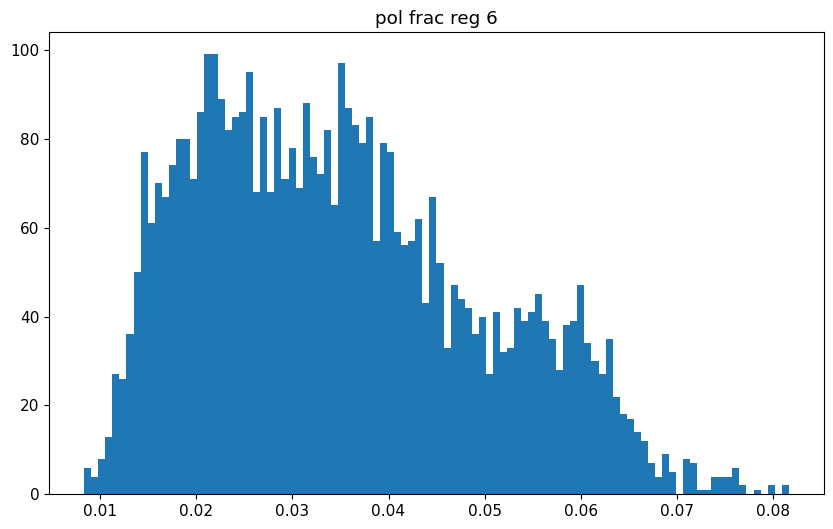

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure(figsize = (10, 6))
hist, bins, patches = plt.hist(pol_frac_list[6], 100)
plt.title('pol frac reg '+ str(6))
plt.show()
plt.savefig('pol_frac_'+str(6))

What you want to do:
- Find mask coordinates at each point in the mask
- polarization analysis points: orion_A[mask_points]

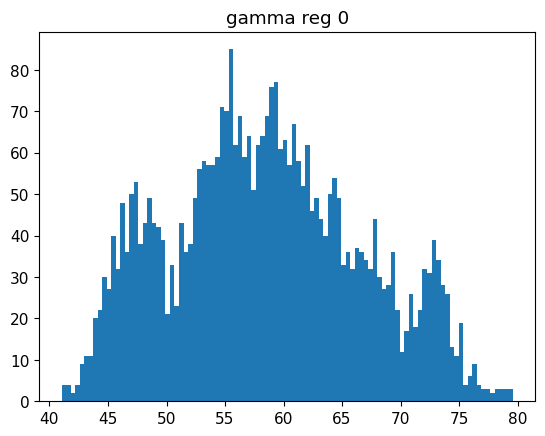

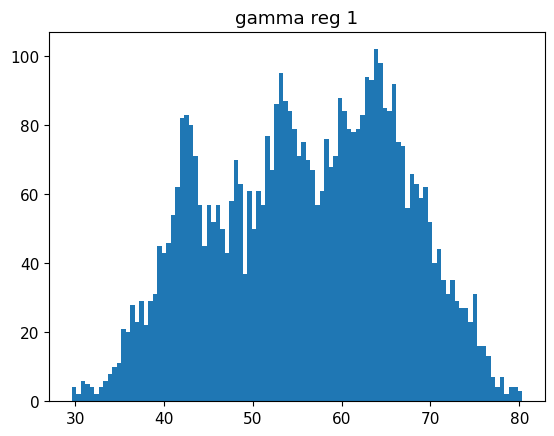

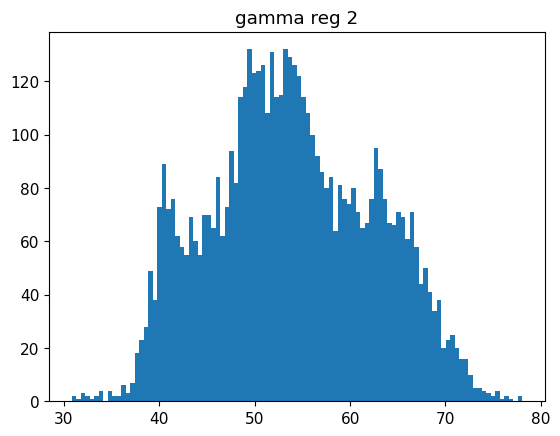

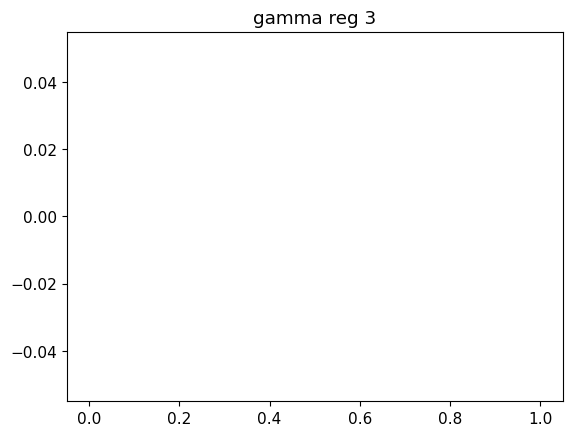

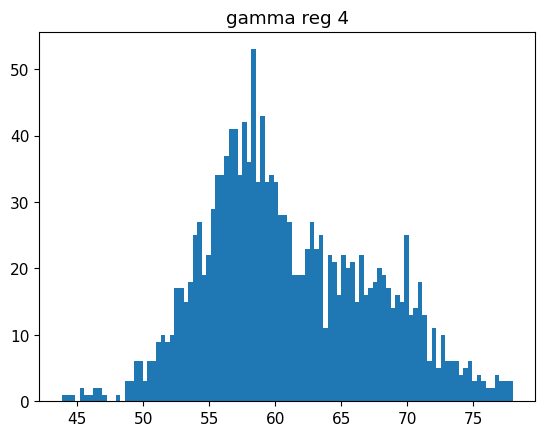

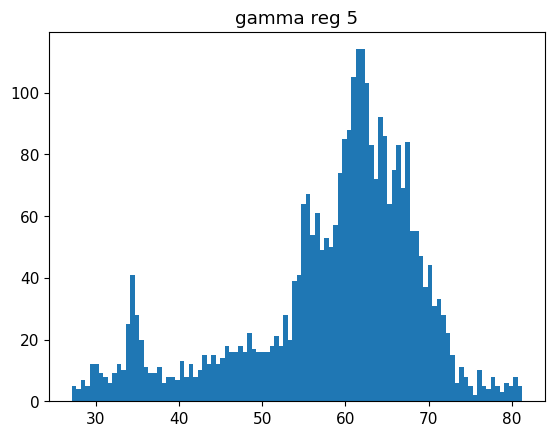

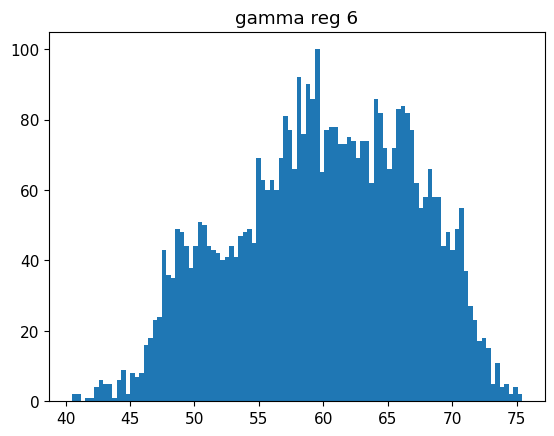

In [31]:
p_max = 0.15
p_0 = (3*p_max)/(3+p_max)

for x in range(len(pol_frac_list)):
    #plt.figure(figsize = (10, 6))
    gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in pol_frac_list[x]]

    hist, bins, patches = plt.hist(gamma, 100)
    plt.title('gamma reg '+ str(x))
    plt.show()
    #plt.savefig('Gamma_'+str(x))


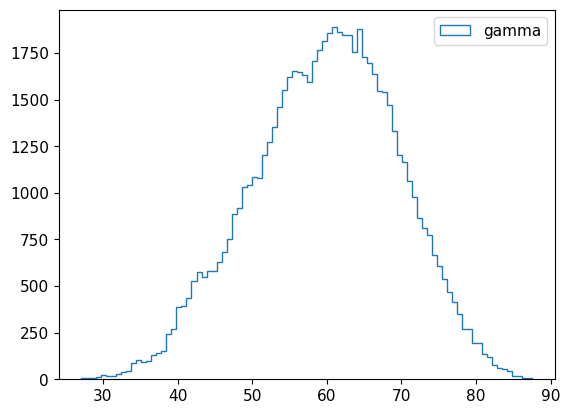

In [22]:
#locate null values of pol_frac
p = pol_frac.nonzero()

#list of nonzero values for pol_frac
pol_f = pol_frac[p]
pol_f = pol_f[np.logical_not(np.isnan(pol_f))]  #removes nan values; *is this needed?

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)

gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in pol_f]
gamma_p, bins, patches = plt.hist(gamma, 90, histtype = 'step', label = 'gamma')
plt.legend()

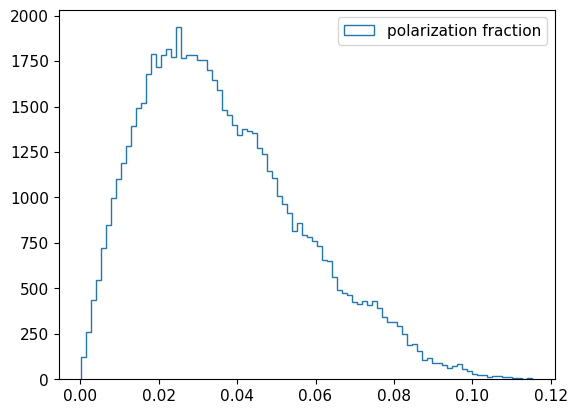

In [23]:
p_frac, bins, patches = plt.hist(pol_f, 90, histtype = 'step', label = 'polarization fraction')
plt.legend()